# 4 лаба по непонятной теме

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
file_path = 'C:/Users/Mi/Downloads/gdp_csv.csv'
if '.csv' in file_path and os.path.exists(file_path) == True:    
    data = pd.read_csv(file_path)
    if not(os.path.getsize(file_path) > 0 and data.isnull().values.any()):
        print(data.head(10))
    else:
        print('Походу, файл битый')
else:
    print('Файла не существует или он другого формата')

  Country Name Country Code  Year         Value
0   Arab World          ARB  1968  2.576068e+10
1   Arab World          ARB  1969  2.843420e+10
2   Arab World          ARB  1970  3.138550e+10
3   Arab World          ARB  1971  3.642691e+10
4   Arab World          ARB  1972  4.331606e+10
5   Arab World          ARB  1973  5.501839e+10
6   Arab World          ARB  1974  1.051458e+11
7   Arab World          ARB  1975  1.163370e+11
8   Arab World          ARB  1976  1.448462e+11
9   Arab World          ARB  1977  1.673083e+11


## Все коды стран:

In [19]:
unique_code = data['Country Code'].unique()
print(unique_code)

['ARB' 'CSS' 'CEB' 'EAR' 'EAS' 'EAP' 'TEA' 'EMU' 'ECS' 'ECA' 'TEC' 'EUU'
 'FCS' 'HPC' 'HIC' 'IBD' 'IBT' 'IDB' 'IDX' 'IDA' 'LTE' 'LCN' 'LAC' 'TLA'
 'LDC' 'LMY' 'LIC' 'LMC' 'MEA' 'MNA' 'TMN' 'MIC' 'NAC' 'OED' 'OSS' 'PSS'
 'PST' 'PRE' 'SST' 'SAS' 'TSA' 'SSF' 'SSA' 'TSS' 'UMC' 'WLD' 'AFG' 'ALB'
 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF' 'TCD'
 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CYP'
 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH'
 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL'
 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND'
 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE'
 'LTU' 'LUX' 'MAC' 'MKD' 'MDG' 'MWI' 'MYS' 'MDV' 'M

Введите код страны: RUS
Coefficients:  [[6.9489716e+10]]


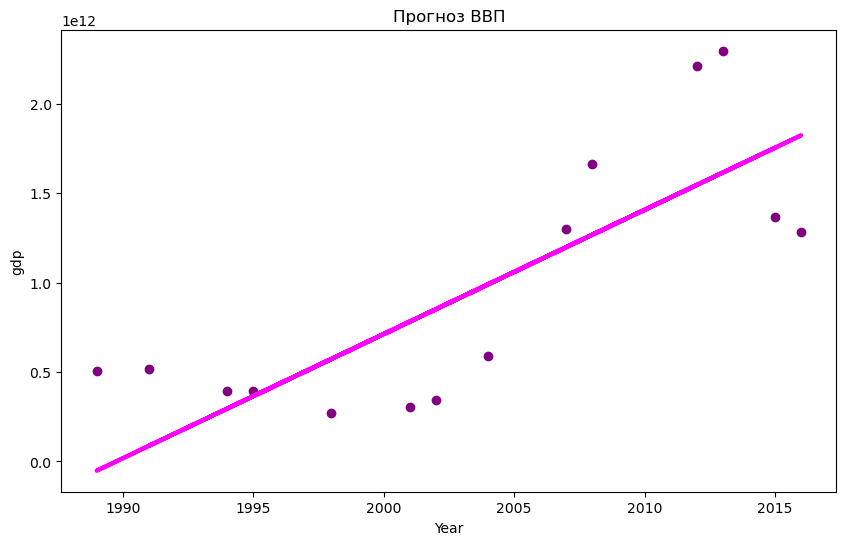

In [33]:
country_code = input('Введите код страны: ')
if not(country_code in unique_code):
    print('Нет такого кода')
else:
    filtered_data = data[data['Country Code'] == country_code]
    x = filtered_data[['Year']]
    y = filtered_data[['Value']]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5)
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Коэффициент: ", model.coef_)
    plt.figure(figsize=(10,6))
    plt.xlabel('Year')
    plt.ylabel('gdp')
    plt.title('Прогноз ВВП')
    plt.scatter(x_test, y_test, color="purple")
    plt.plot(x_test, y_pred, color="magenta", linewidth=3)
    plt.show()